# importing data and arranging them properly

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [95]:
cols=['ID', 'platform', 'Sentiment', 'review']
data=pd.read_csv("C:\\Users\\KARTHIK M\\Documents\\Internship\\Prodigy InfoTech\\Task 4\\twitter_training.csv",names=cols)
data.head()

,ID,platform,Sentiment,review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [96]:
data.shape

(74682, 4)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   platform   74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   review     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [98]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [99]:
data.describe(include=object)

,platform,Sentiment,review
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [100]:
#missing data
missing_data = data.isna().sum()
pd.set_option('display.max_rows', None)
print(missing_data)

ID             0
platform       0
Sentiment      0
review       686
dtype: int64


In [101]:
#removing null data
data=data.dropna()
#missing data
missing_data = data.isna().sum()
pd.set_option('display.max_rows', None)
print(missing_data)

ID           0
platform     0
Sentiment    0
review       0
dtype: int64


In [102]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

def preprocess_text(text):
    # Normalize text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming/Lemmatization
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = [ps.stem(word) for word in words]
    # Join words back to a single string
    return ' '.join(words)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

data['review'] = data['review'].apply(preprocess_text)
data.head()

[nltk_data] Downloading package punkt to C:\Users\KARTHIK
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KARTHIK
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KARTHIK
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,ID,platform,Sentiment,review
0,2401,Borderlands,Positive,im get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder
4,2401,Borderlands,Positive,im get borderland 2 murder


# EDA

# Univariant

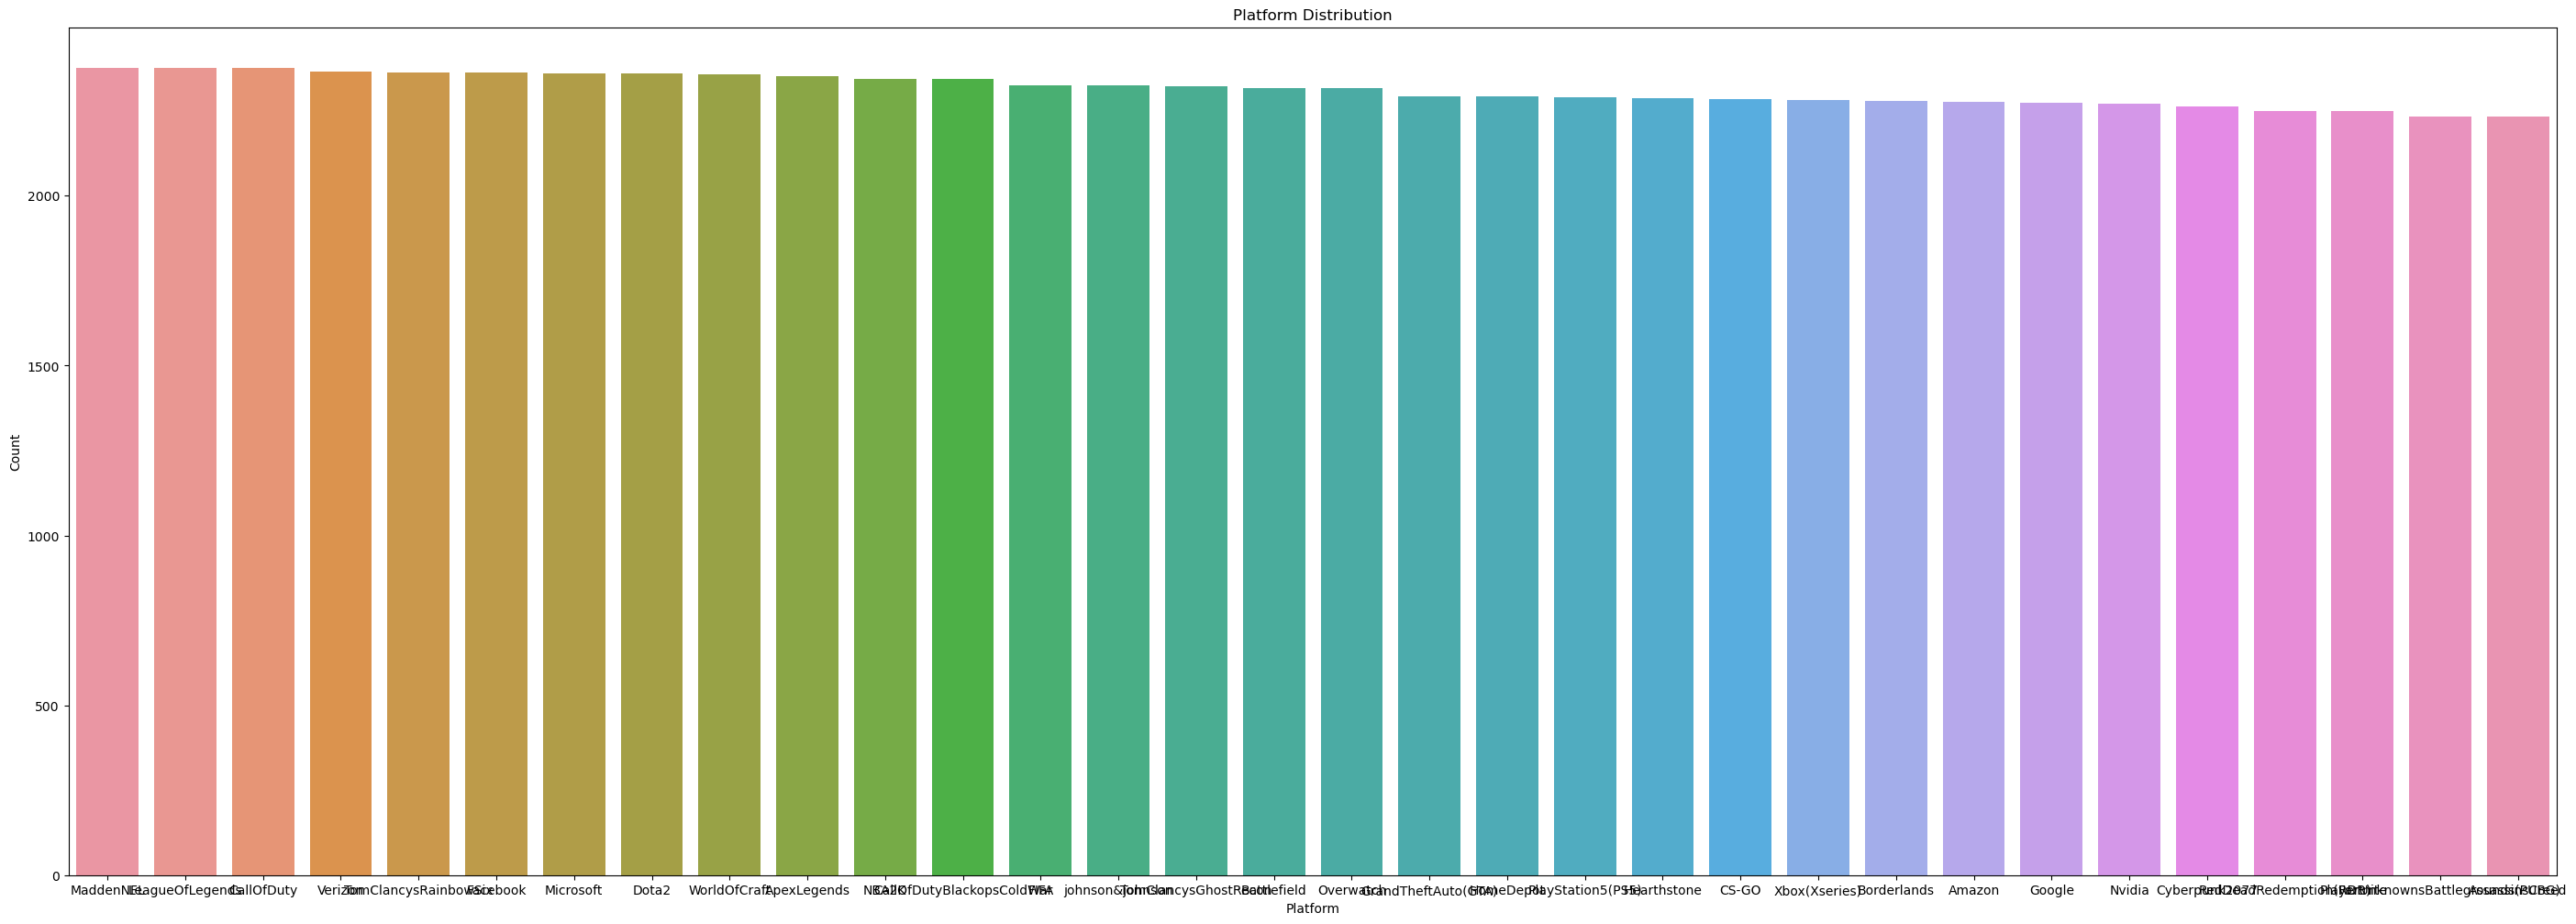

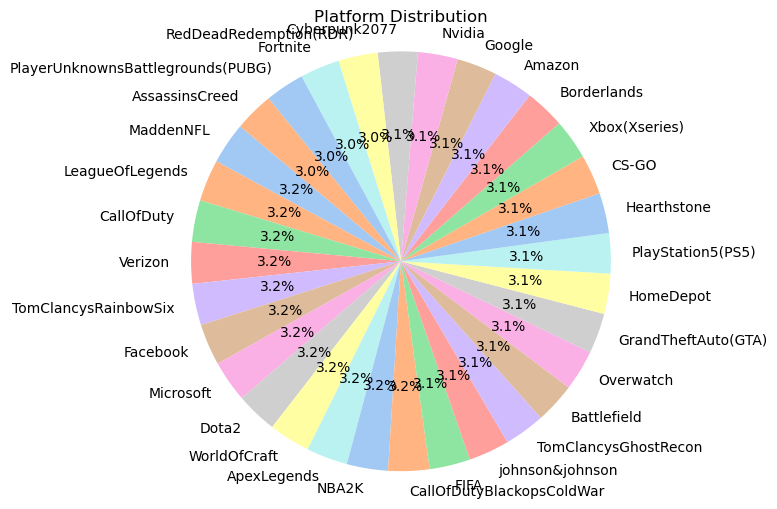

MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                       

In [103]:
# Count of platform classes
platform_counts = data['platform'].value_counts()

# Bar Plot
plt.figure(figsize=(35, 12))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Platform Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

print(platform_counts)

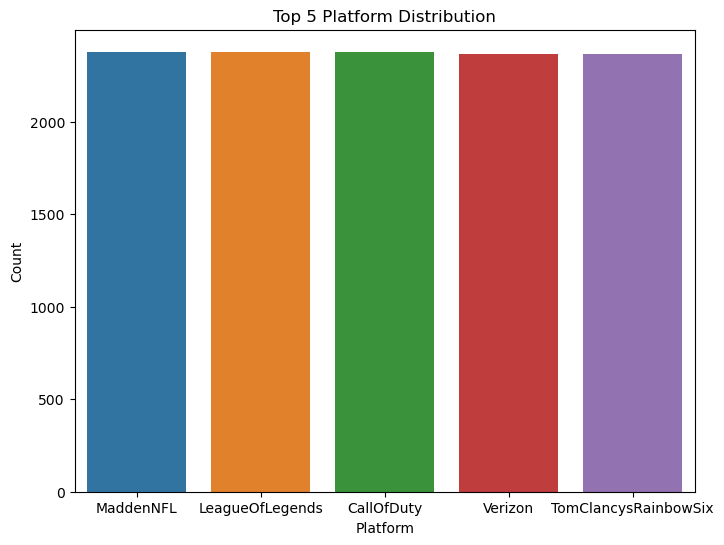

MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Name: platform, dtype: int64


In [104]:
# Count of platform classes
platform_counts_top5 = data['platform'].value_counts().nlargest(5)

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts_top5.index, y=platform_counts_top5.values)
plt.title('Top 5 Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

print(platform_counts_top5)

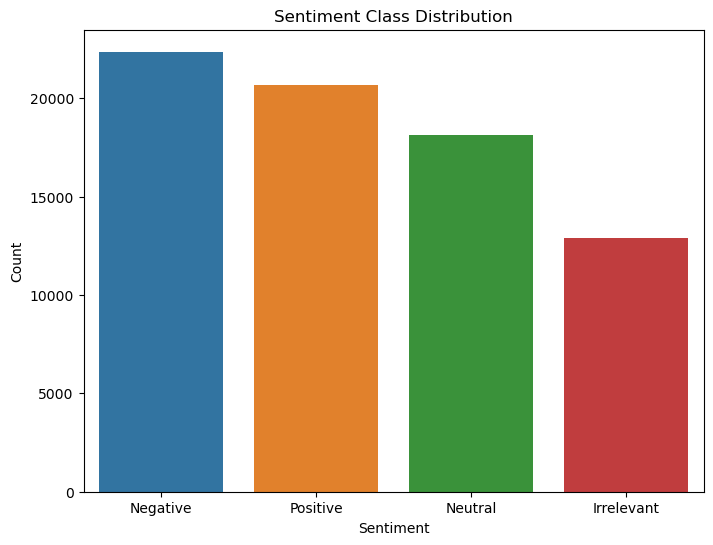

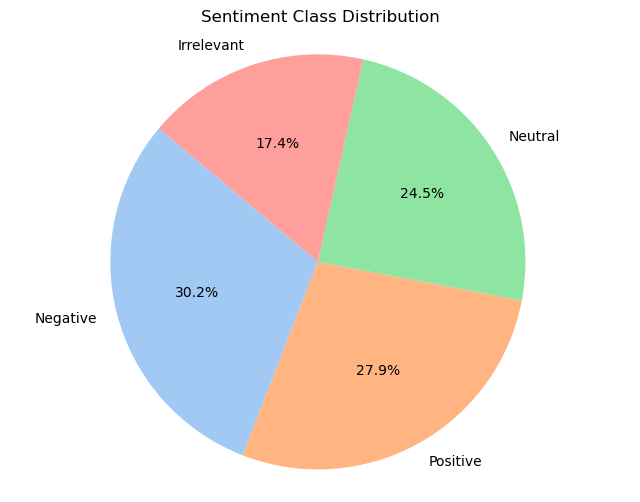

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of sentiment classes
sentiment_counts = data['Sentiment'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sentiment Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

print(sentiment_counts)

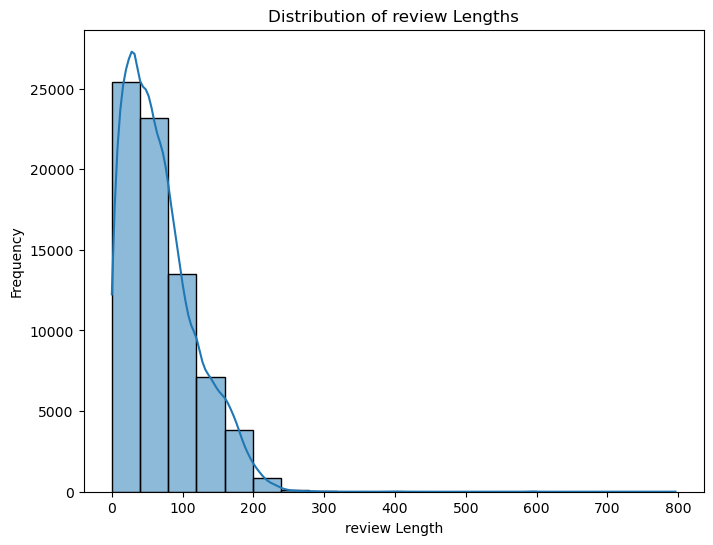

In [106]:
# Length of text
data['review_Length'] = data['review'].apply(len)

# Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['review_Length'], bins=20, kde=True)
plt.title('Distribution of review Lengths')
plt.xlabel('review Length')
plt.ylabel('Frequency')
plt.show()


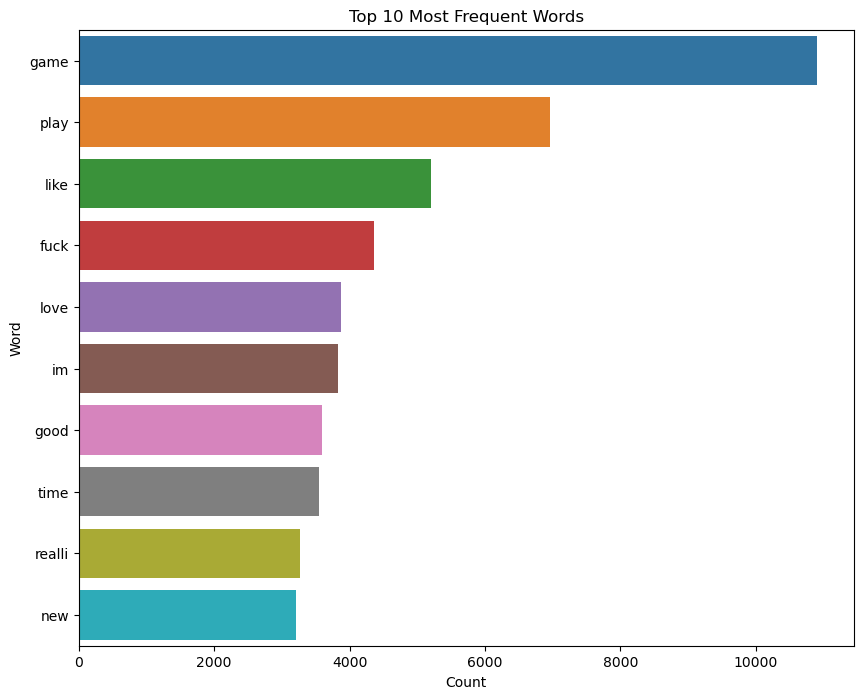

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['review'])
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Create DataFrame for word counts
word_freq_df = pd.DataFrame({'word': words, 'count': word_counts})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=word_freq_df.head(10)['count'], y=word_freq_df.head(10)['word'])
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# bivariant

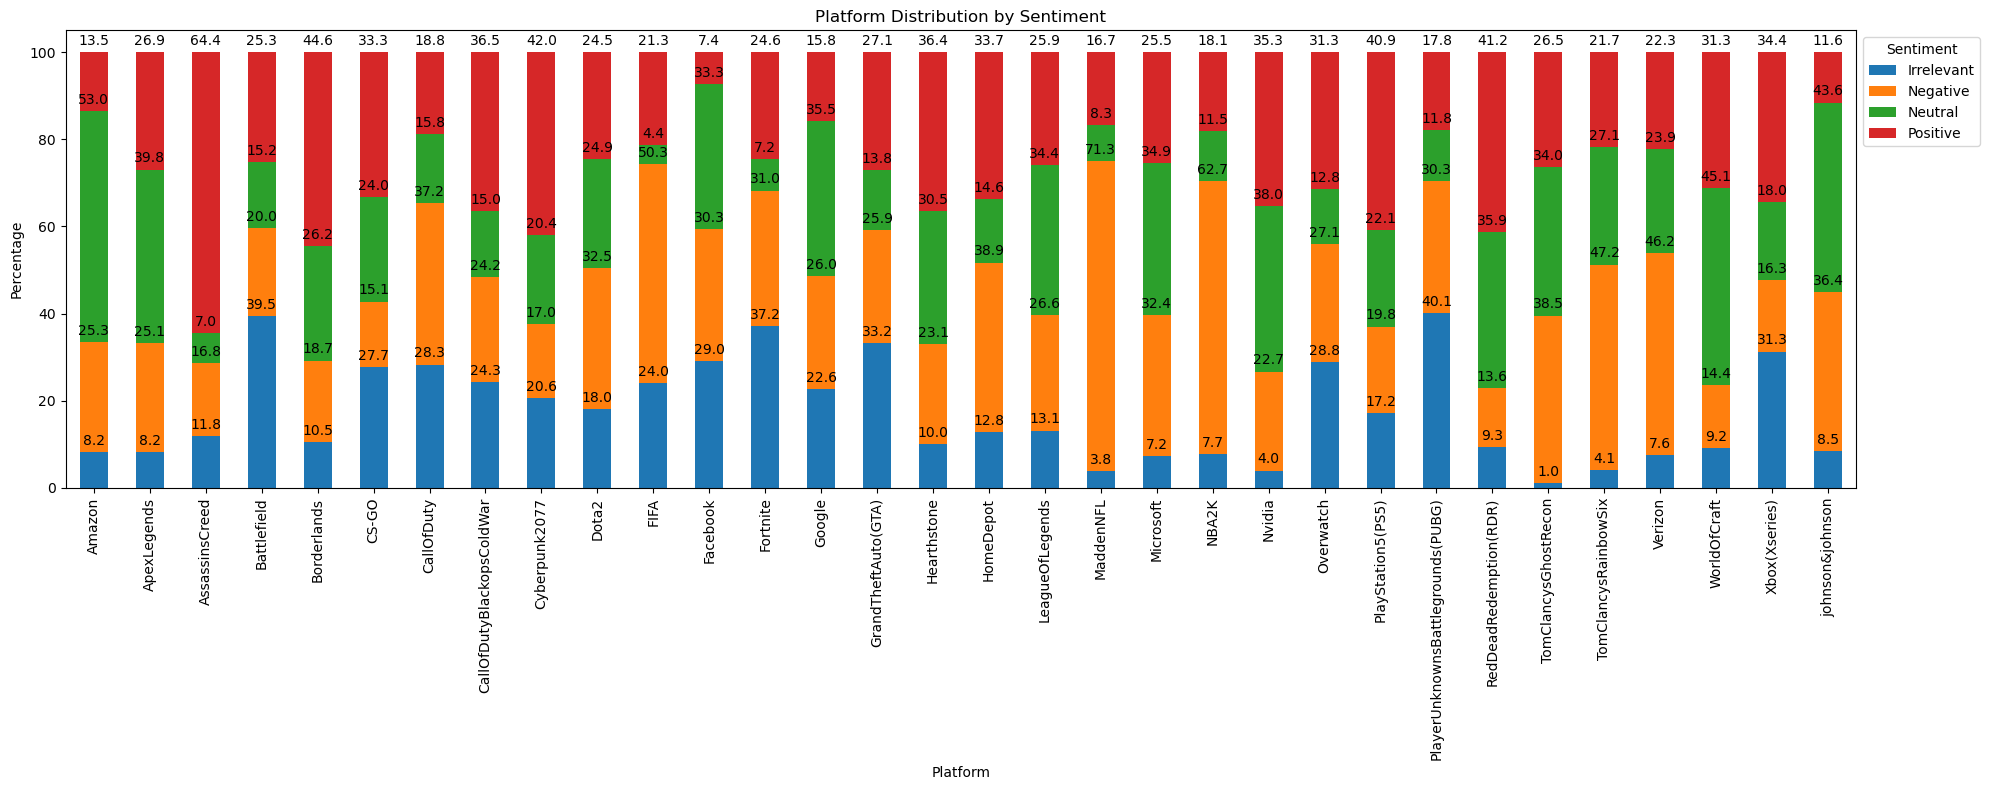

In [108]:
# Define categorical attributes
categorical_attributes = ['platform']

# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(20, 8))

# Calculate the count and ratio for each attribute and Sentiment combination
for i, attribute in enumerate(categorical_attributes):
    percentData = data.groupby([attribute, 'Sentiment']).size().reset_index(name='n')
    percentData['ratio'] = percentData.groupby(attribute)['n'].apply(lambda x: 100 * x / x.sum())

    # Create the stacked bar chart with percentage labels
    bar_plot = percentData.pivot(index=attribute, columns='Sentiment', values='ratio').plot.bar(
        stacked=True, ax=axes
    )

    for rect in axes.containers:
        axes.bar_label(rect, label_type='edge', labels=np.round(rect.datavalues, 1), padding=3)

    # Set the axis titles and legend
    axes.set_title(f'{attribute.capitalize()} Distribution by Sentiment')
    axes.set_xlabel(attribute.capitalize())
    axes.set_ylabel('Percentage')
    handles, _ = axes.get_legend_handles_labels()
    labels = percentData['Sentiment'].unique()
    axes.legend(handles, labels, title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

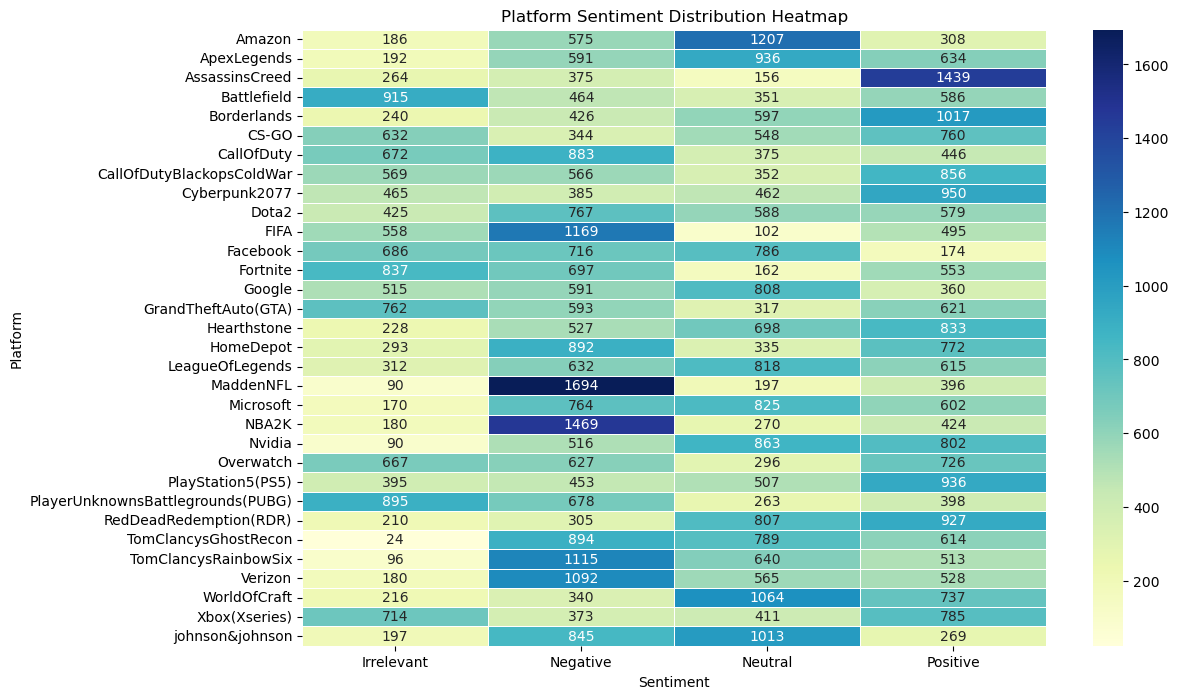

In [109]:
# Create the contingency table
platform_sentiment_table = pd.crosstab(data['platform'], data['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(platform_sentiment_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Platform Sentiment Distribution Heatmap')
plt.xlabel('Sentiment')
plt.ylabel('Platform')
plt.show()

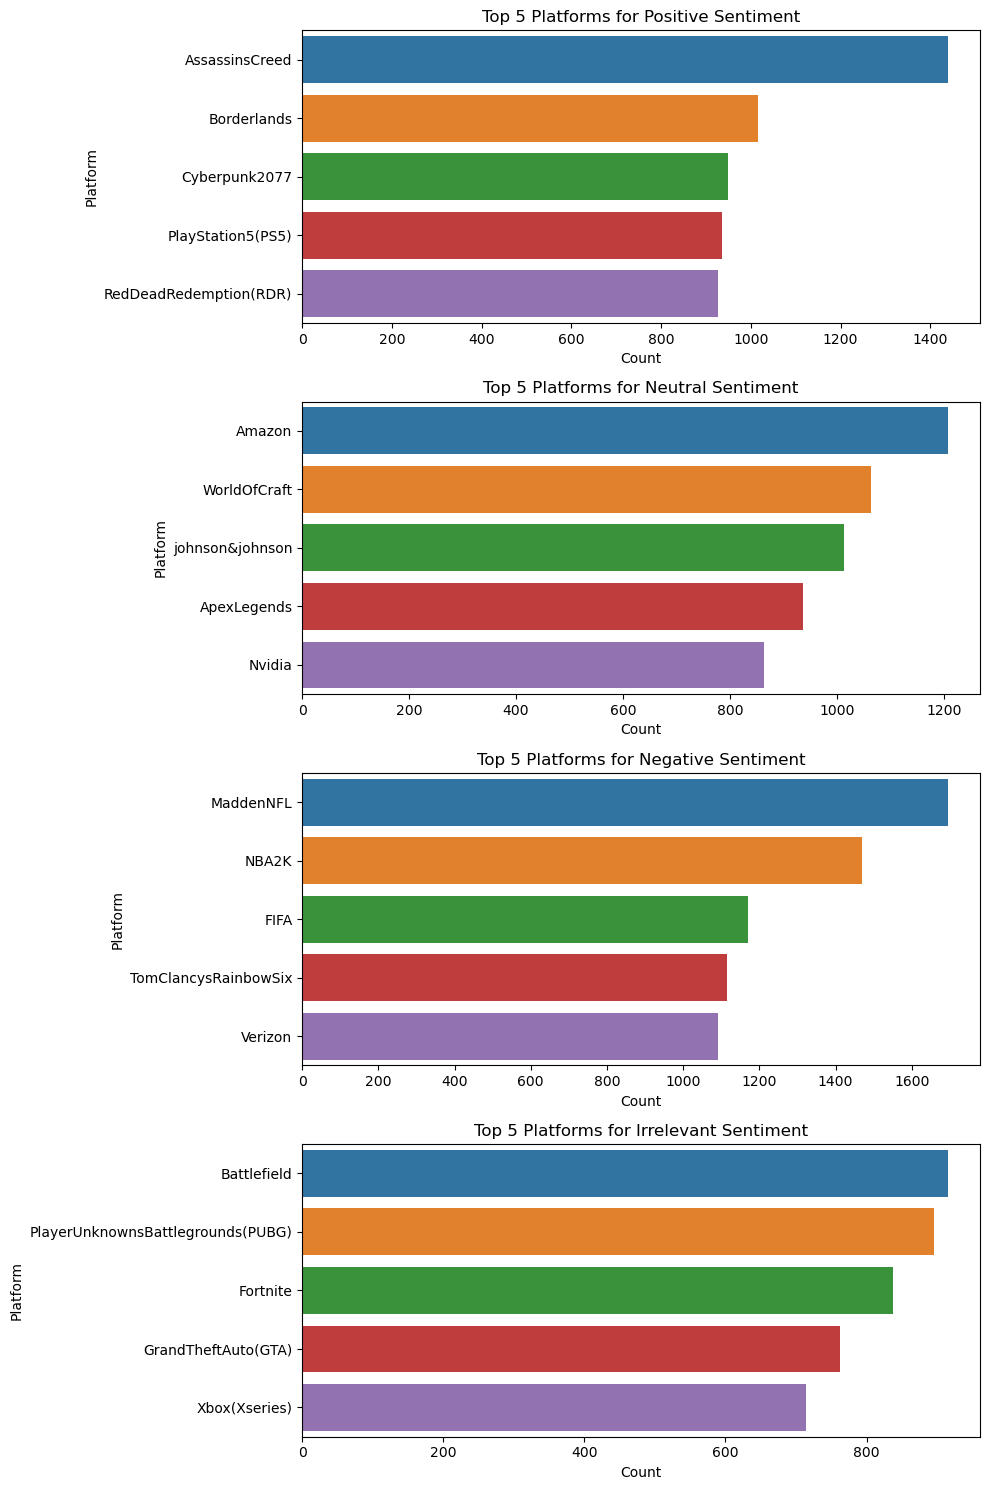

In [110]:
# Function to get top 5 platforms for each sentiment
def get_top_platforms(df, sentiment, top_n=5):
    filtered_df = df[df['Sentiment'] == sentiment]
    top_platforms = filtered_df['platform'].value_counts().nlargest(top_n)
    return top_platforms

# Sentiment categories
sentiments = data['Sentiment'].unique()

# Plotting
fig, axes = plt.subplots(nrows=len(sentiments), ncols=1, figsize=(10, 15))

for i, sentiment in enumerate(sentiments):
    top_platforms = get_top_platforms(data, sentiment)
    sns.barplot(x=top_platforms.values, y=top_platforms.index, ax=axes[i])
    axes[i].set_title(f'Top 5 Platforms for {sentiment} Sentiment')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Platform')

plt.tight_layout()
plt.show()

In [111]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[nltk_data] Downloading package stopwords to C:\Users\KARTHIK
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KARTHIK
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


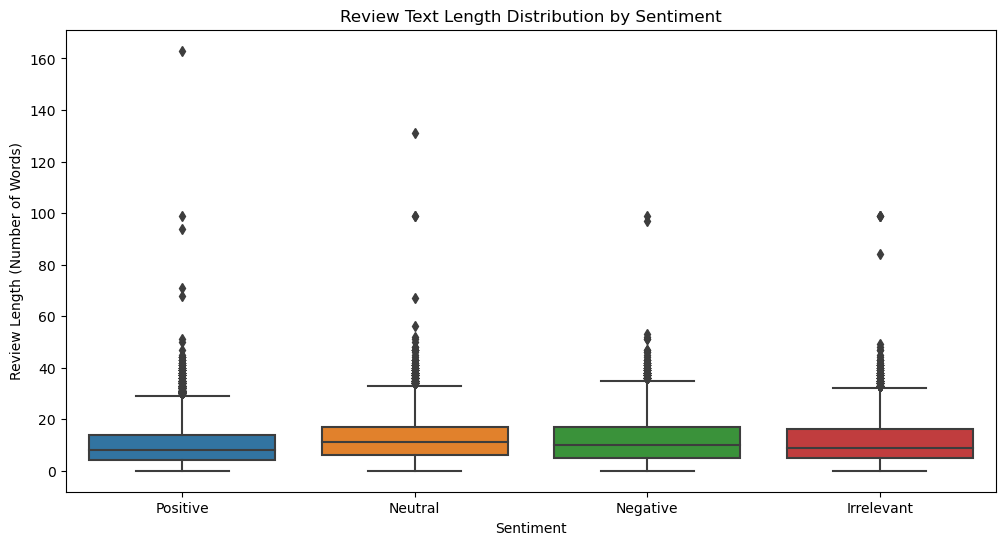

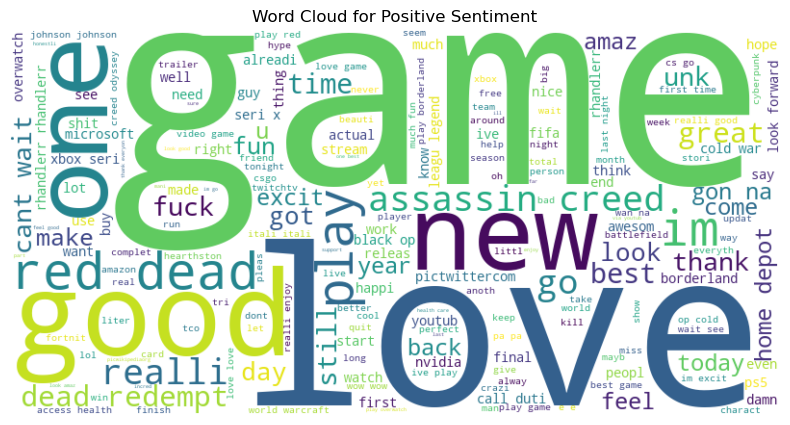

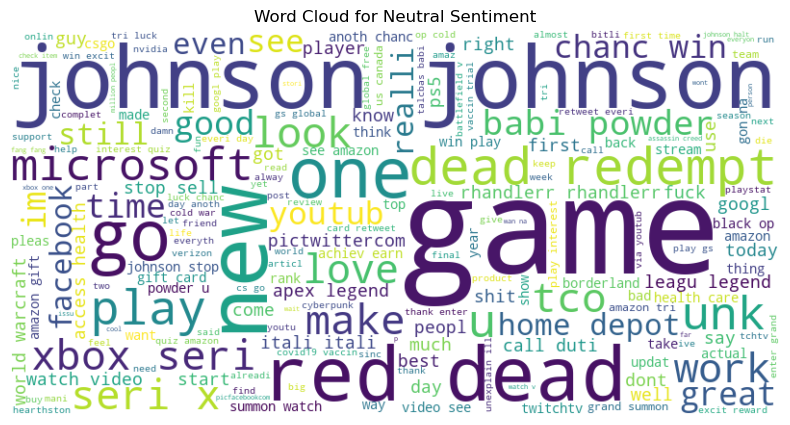

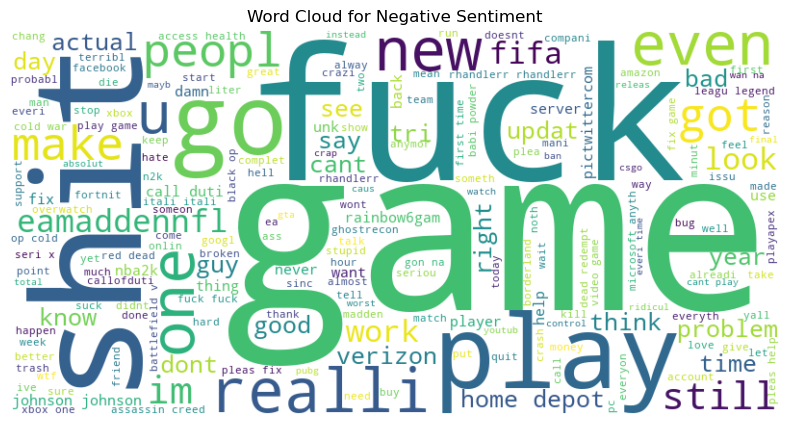

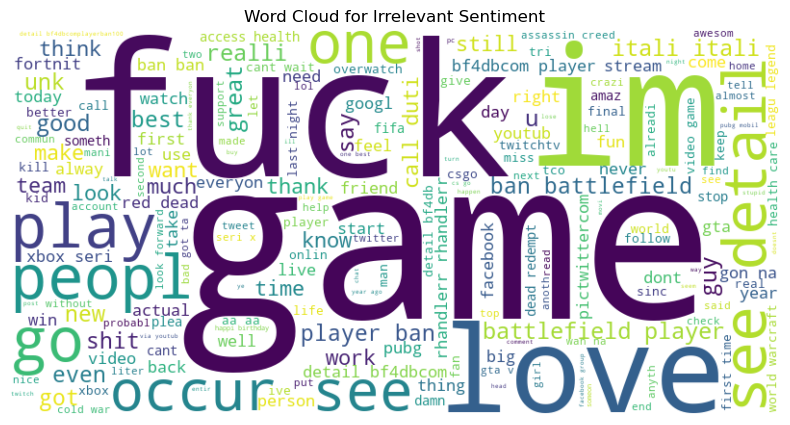

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # Importing WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the stopwords downloaded
nltk.download('stopwords')
# Ensure you have the stopwords downloaded
nltk.download('stopwords')

data['review_length'] = data['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='review_length', data=data)
plt.title('Review Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (Number of Words)')
plt.show()

# Function to create and display a word cloud for each sentiment
def plot_word_cloud(data, sentiment):
    reviews = data[data['Sentiment'] == sentiment]['review'].values
    text = ' '.join(reviews)
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words and word not in string.punctuation])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Plot word clouds for each sentiment
sentiments = data['Sentiment'].unique()
for sentiment in sentiments:
    plot_word_cloud(data, sentiment)

# multi-varaiant

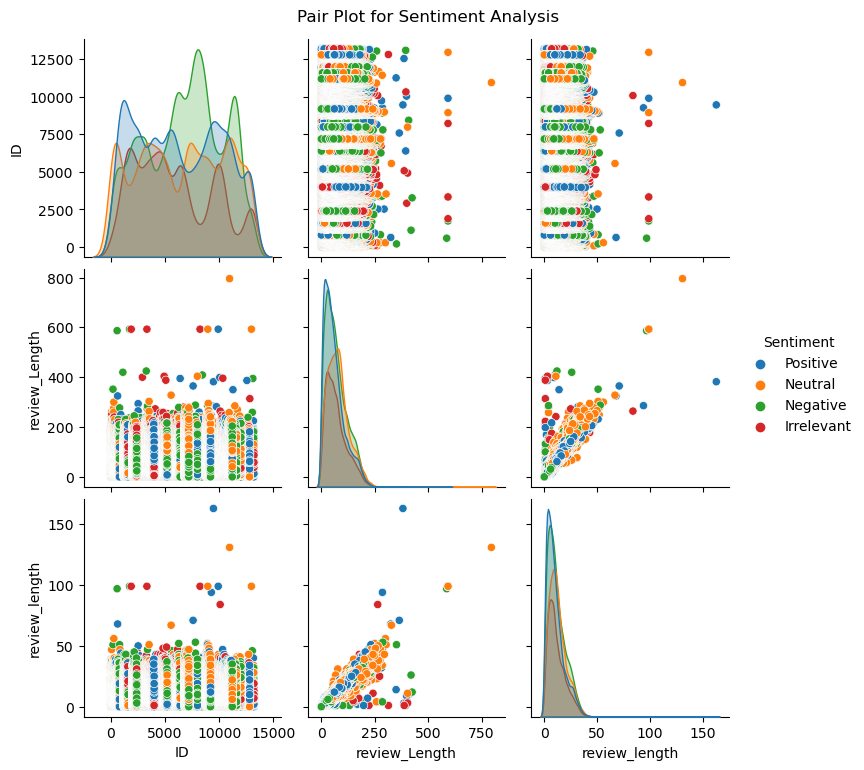

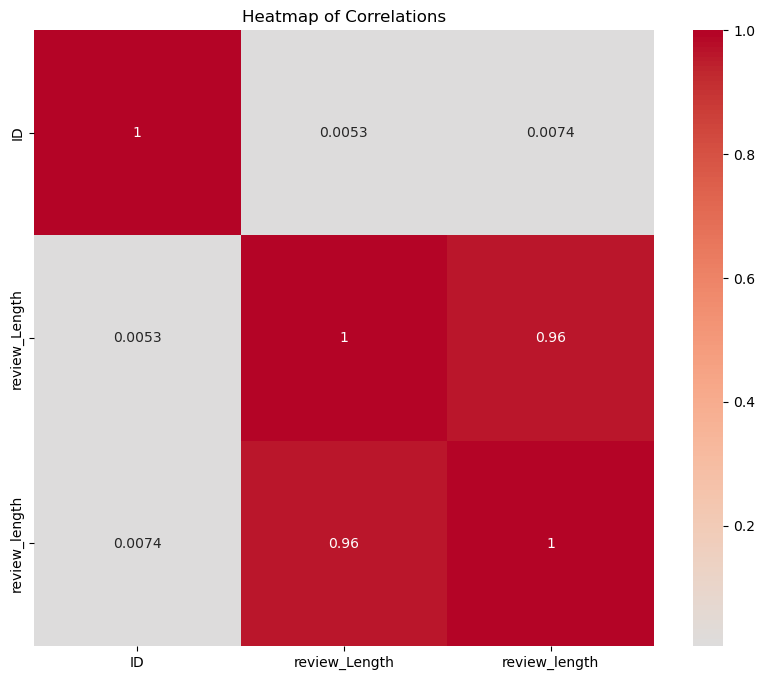

In [113]:
# Text length distribution
data['review_length'] = data['review'].apply(lambda x: len(x.split()))

# Pair plot for numerical and categorical data
sns.pairplot(data, hue='Sentiment', diag_kind='kde')
plt.suptitle('Pair Plot for Sentiment Analysis', y=1.02)
plt.show()

# Heatmap for correlation (though limited numerical data here)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlations')
plt.show()

